In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
# Read in CSV file with our cleaned up data
wildlife_data = pd.read_csv("../../Resources/Wildlife_dfm.csv")
wildlife_data

,Unnamed: 0,Date,Weathercode,Max Temperature,Min Temperature,Mean Temperature,Sunrise,Sunset,Total Precipitation,Total Rain,...,Species,Common.Name,Species.Diet,Number.of.Animals,Camera.Make,Camera.Model,Flash..Yes.or.No.,Bait.Used,Photos.per.trigger,Description_y
0,0,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.000,0.000,...,Sapiens,Human non-staff,Omnivore,1,Bushnell,Agressor,No,None,3,NaN
1,1,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.000,0.000,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
2,2,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.000,0.000,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
3,3,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.000,0.000,...,Lupus Familiaris,Domestic Dog,Carnivore,1,Bushnell,Agressor,No,None,3,NaN
4,4,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.000,0.000,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89934,89934,2020-11-07,73,55.0,34.2,46.0,08:05:00,18:15:00,0.446,0.355,...,Mephitis,Striped Skunk,Omnivore,1,Bushnell,Agressor,No,None,3,NaN
89935,89935,2020-11-07,73,55.0,34.2,46.0,08:05:00,18:15:00,0.446,0.355,...,Catus,Domestic Cat,Carnivore,1,Bushnell,Agressor,No,None,3,NaN
89936,89936,2020-11-07,73,55.0,34.2,46.0,08:05:00,18:15:00,0.446,0.355,...,Catus,Domestic Cat,Carnivore,1,Bushnell,Agressor,No,None,3,NaN
89937,89937,2020-11-07,73,55.0,34.2,46.0,08:05:00,18:15:00,0.446,0.355,...,Lotor,Northern Raccoon,Omnivore,1,Bushnell,Agressor,No,None,3,NaN


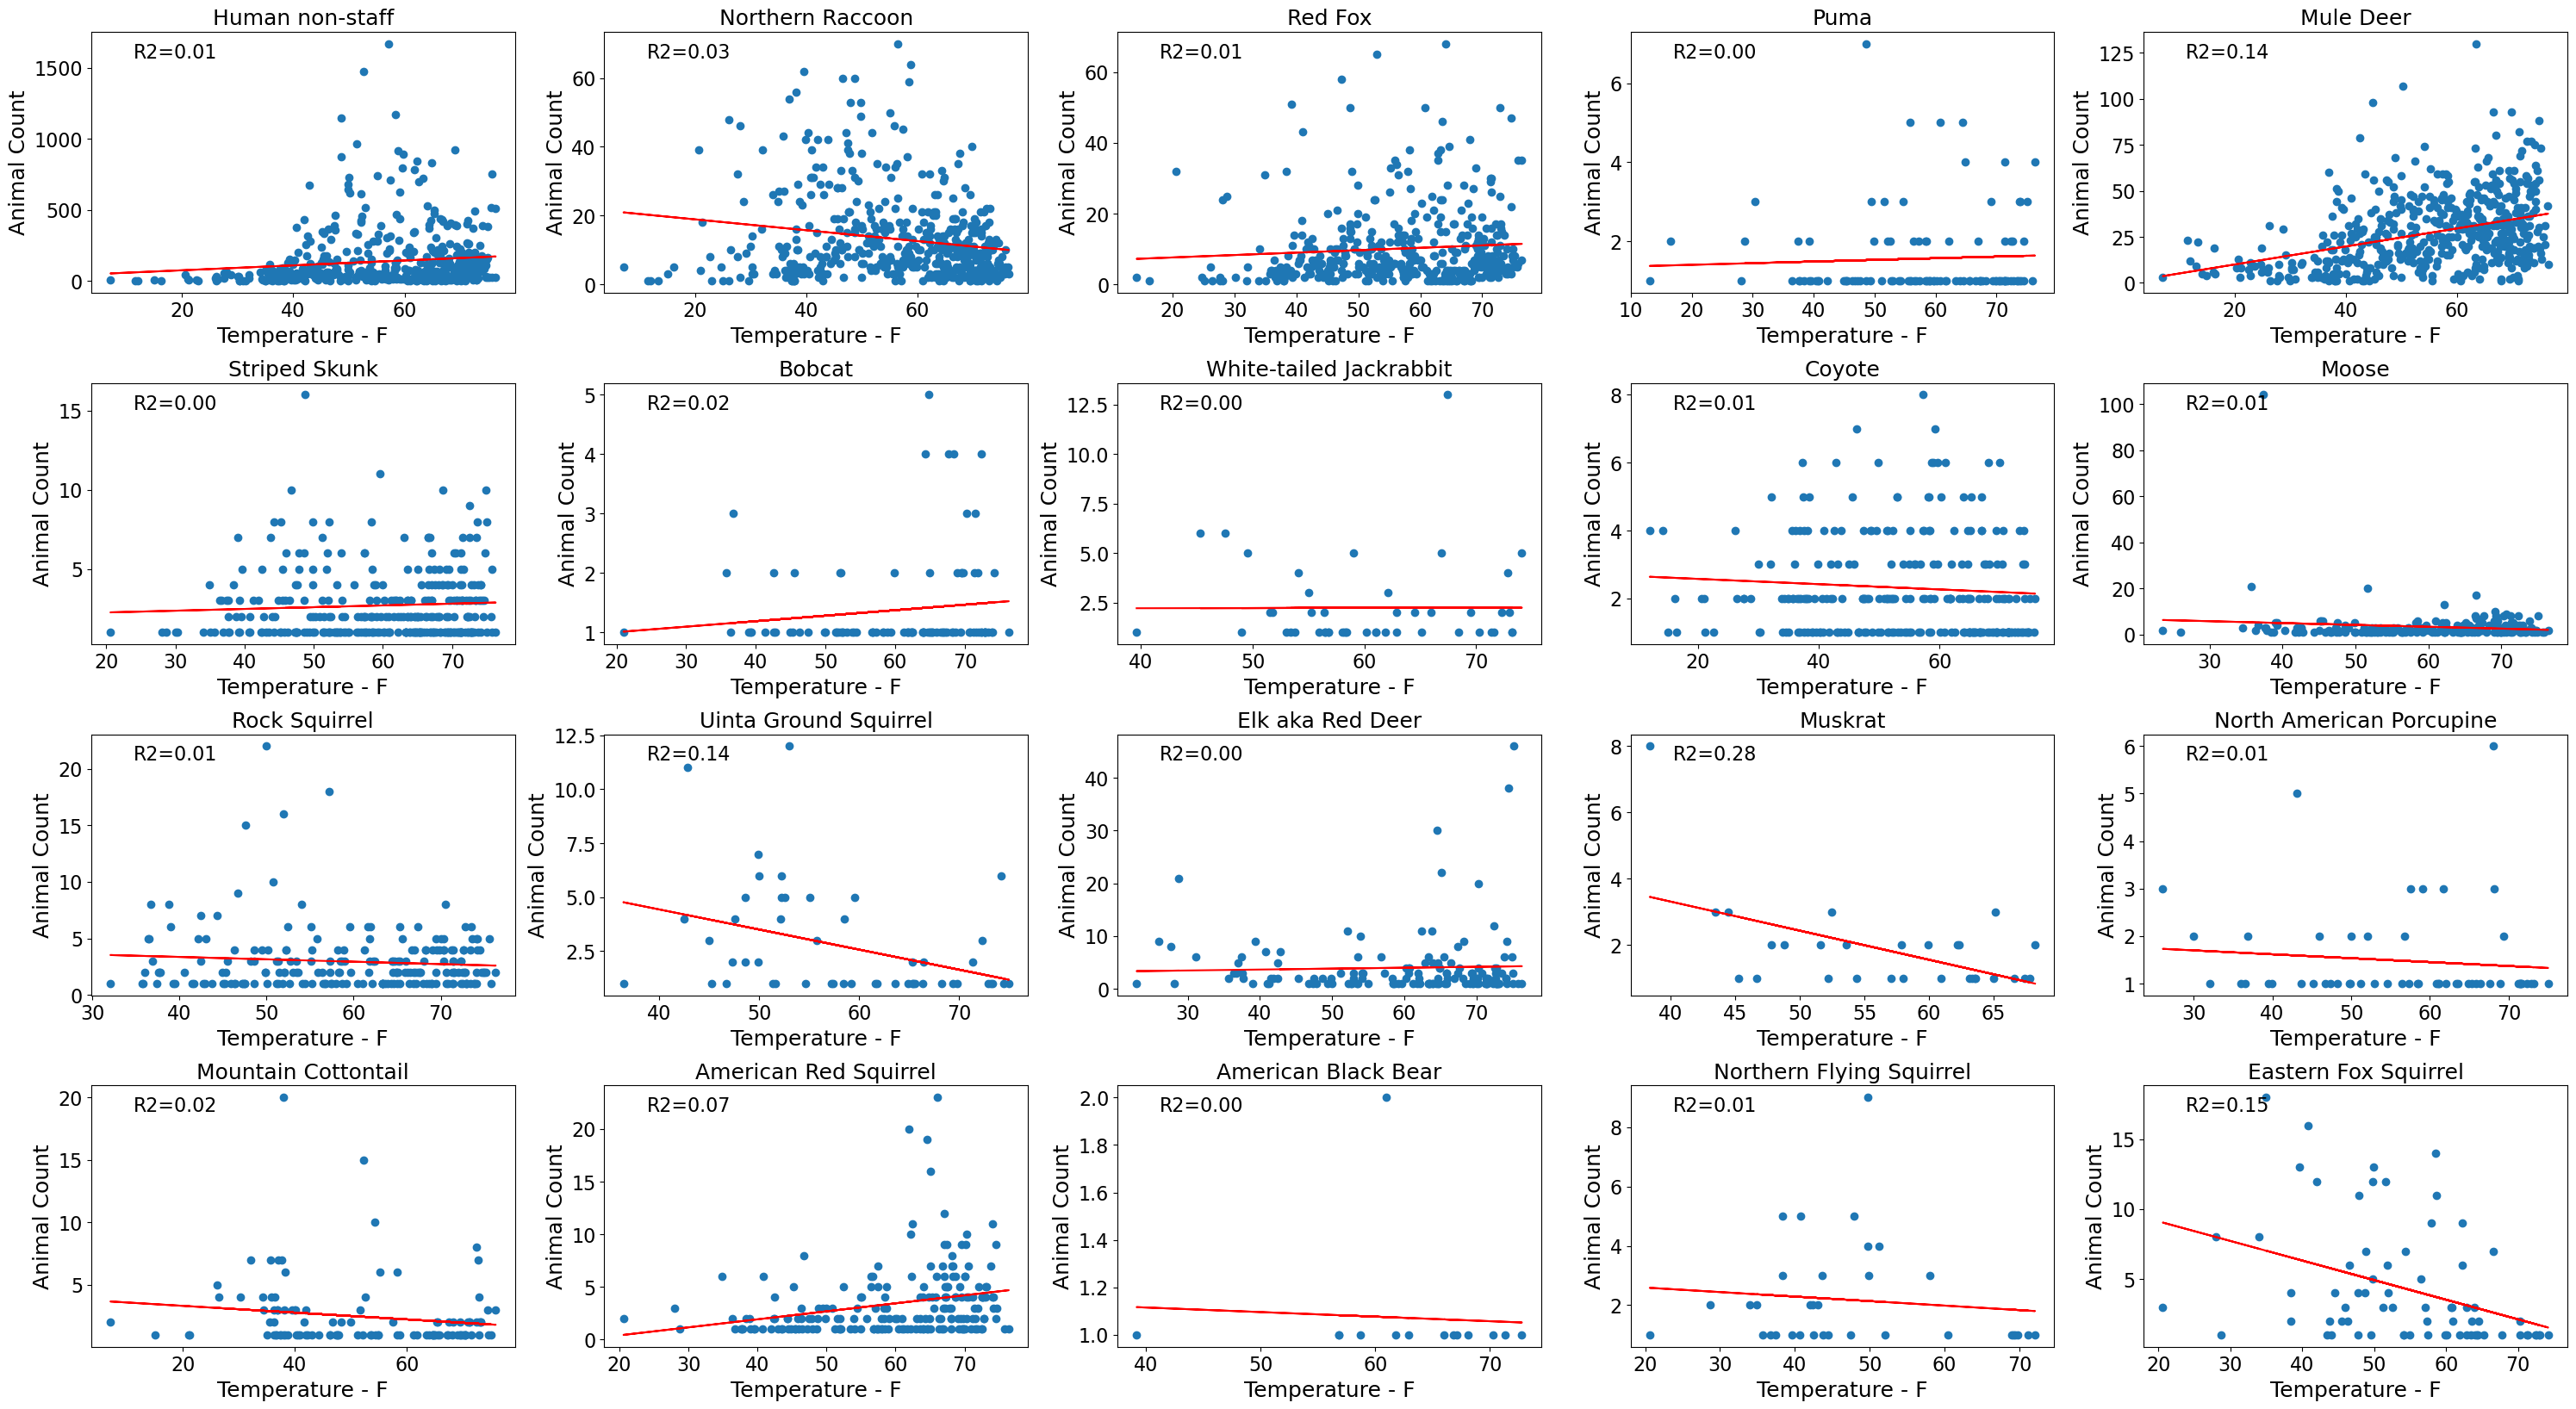

In [92]:
# Create plots for temperature
animal_list = list(wildlife_data["Common.Name"].unique())
animal_list.remove("Western Spotted Skunk")
animal_list.remove("Yellow-bellied Marmot")
animal_list.remove("Domestic Cow")
animal_list.remove("Bicycle")
animal_list.remove("Domestic Cat")
animal_list.remove("Domestic Dog")
animal_list.remove("Domestic Horse")
animal_list.remove("Snowshoe Hare")
animal_list.remove("American Badger")
animal_list.remove("American Beaver")

fig, axes = plt.subplots(6,5,figsize=(30,24))

for i,animal in enumerate(animal_list):
    animal_group = wildlife_data.groupby("Common.Name")
    animal_subgroup = animal_group.get_group(animal)
    animal_date_group = animal_subgroup.groupby(["Date"])
    
    row_idx = i // 5
    col_idx = i % 5
    ax = axes[row_idx,col_idx]
    
    y_values = animal_date_group.sum(numeric_only=True)['Number.of.Animals']
    x_values = animal_date_group.mean(numeric_only=True)["Mean Temperature"]
    
    ax.scatter(x_values,y_values)
    ax.set_title(animal,fontsize=18)
    ax.set_ylabel("Animal Count",fontsize=18)
    ax.set_xlabel("Temperature - F",fontsize=18)
    ax.tick_params(axis='both', which='major',labelsize=16)
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
    r2 = r_value**2
    
    coeffs = np.polyfit(x_values, y_values,1)
    regression_line = np.polyval(coeffs, x_values)
    
    ax.plot(x_values, regression_line, color='red', linestyle='-')
    
    ax.text(0.1,0.9,f"R2={r2:.2f}",transform=ax.transAxes,fontsize=16)
   
for i in range(len(animal_list),6*5):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()


plt.show()


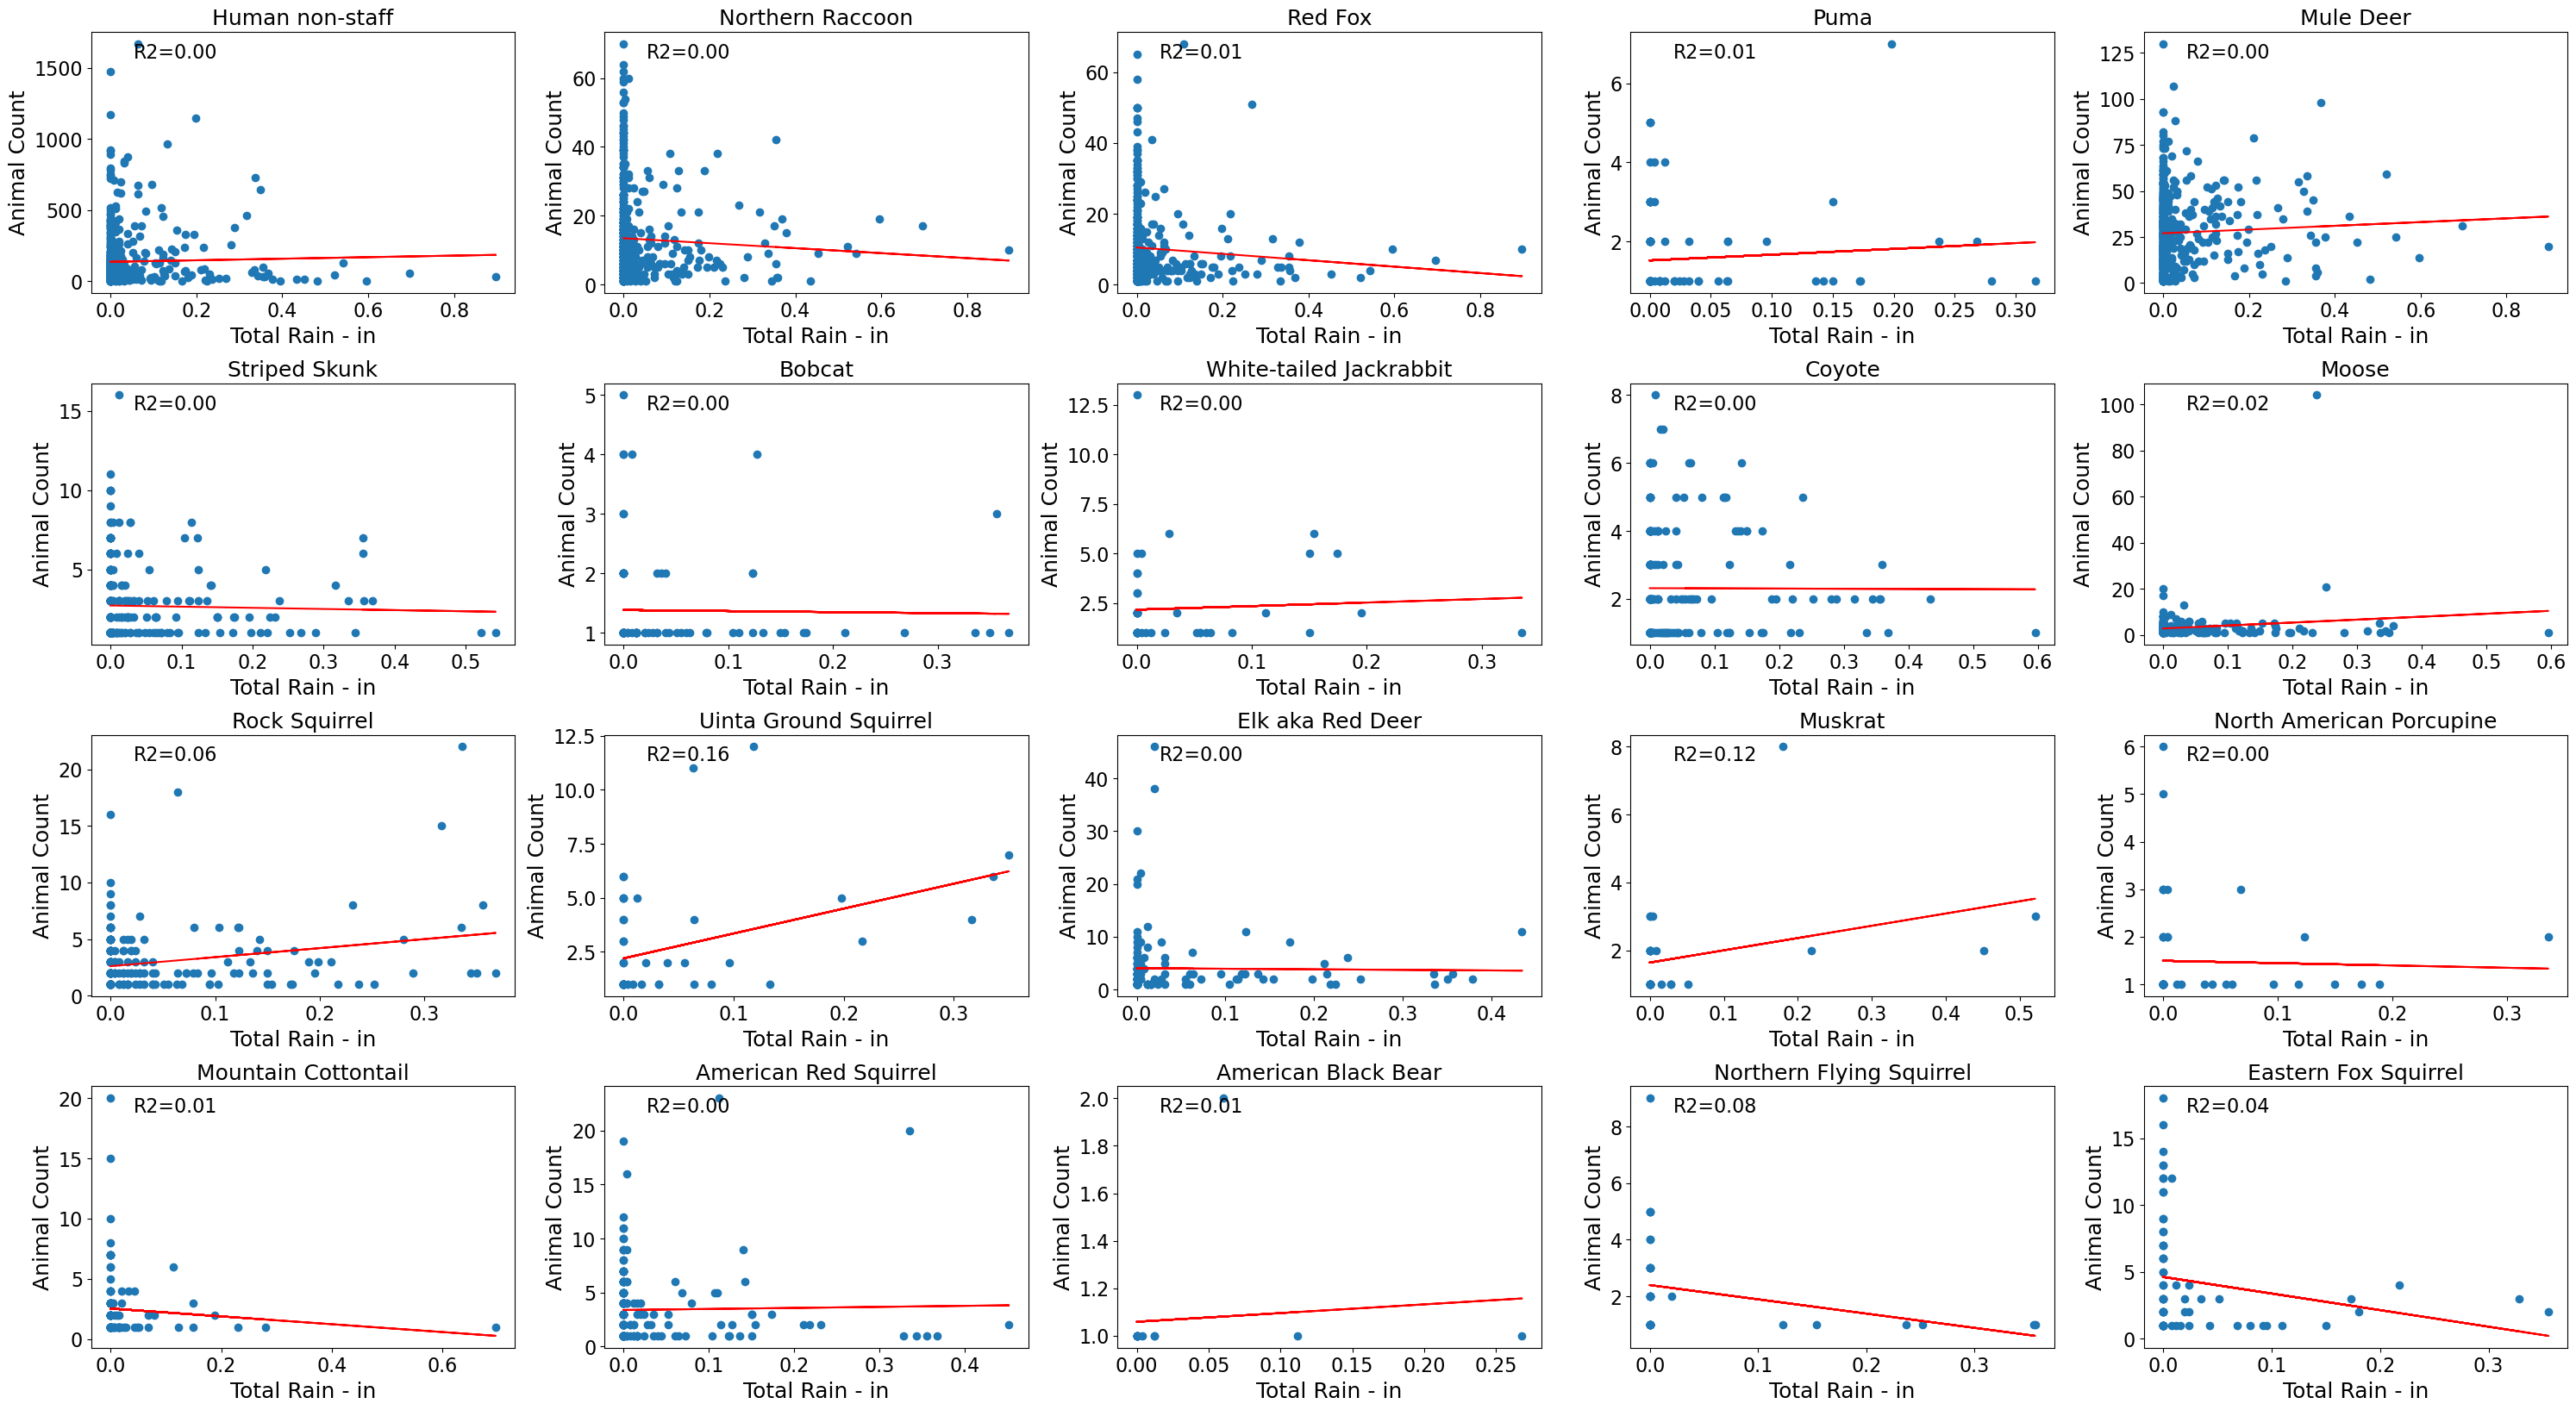

In [93]:
# Create plots for rain
animal_list = list(wildlife_data["Common.Name"].unique())
animal_list.remove("Western Spotted Skunk")
animal_list.remove("Yellow-bellied Marmot")
animal_list.remove("Domestic Cow")
animal_list.remove("Bicycle")
animal_list.remove("Domestic Cat")
animal_list.remove("Domestic Dog")
animal_list.remove("Domestic Horse")
animal_list.remove("Snowshoe Hare")
animal_list.remove("American Badger")
animal_list.remove("American Beaver")

fig, axes = plt.subplots(6,5,figsize=(30,24))

for i,animal in enumerate(animal_list):
    animal_group = wildlife_data.groupby("Common.Name")
    animal_subgroup = animal_group.get_group(animal)
    animal_date_group = animal_subgroup.groupby(["Date"])
    
    row_idx = i // 5
    col_idx = i % 5
    ax = axes[row_idx,col_idx]
    
    y_values = animal_date_group.sum(numeric_only=True)['Number.of.Animals']
    x_values = animal_date_group.mean(numeric_only=True)["Total Rain"]
    
    ax.scatter(x_values,y_values)
    ax.set_title(animal,fontsize=18)
    ax.set_ylabel("Animal Count",fontsize=18)
    ax.set_xlabel("Total Rain - in",fontsize=18)
    ax.tick_params(axis='both', which='major',labelsize=16)
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
    r2 = r_value**2
    
    coeffs = np.polyfit(x_values, y_values,1)
    regression_line = np.polyval(coeffs, x_values)
    
    ax.plot(x_values, regression_line, color='red', linestyle='-')
    
    ax.text(0.1,0.9,f"R2={r2:.2f}",transform=ax.transAxes,fontsize=16)
   
for i in range(len(animal_list),6*5):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()


plt.show()
